# MLP for classification tasks

For this dataset:

LotArea: Total lot area in square feet.

OverallQual: Overall material and finish quality of the house.

OverallCond: Overall condition of the house.

TotalBsmtSF: Total square footage of the basement.

FullBath: Number of full bathrooms.

HalfBath: Number of half bathrooms (a half bath usually has only a toilet and sink).

BedroomAbvGr: Number of bedrooms above ground level.

TotRmsAbvGrd: Total number of rooms above ground level (excluding bathrooms).

Fireplaces: Number of fireplaces in the house.

GarageArea: Square footage of the garage.

AboveMedianPrice: A binary feature (likely encoded as 0 or 1) indicating whether the price of the house is above the median value.

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('/content/housepricedata.csv')
df.head()

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   LotArea           1460 non-null   int64
 1   OverallQual       1460 non-null   int64
 2   OverallCond       1460 non-null   int64
 3   TotalBsmtSF       1460 non-null   int64
 4   FullBath          1460 non-null   int64
 5   HalfBath          1460 non-null   int64
 6   BedroomAbvGr      1460 non-null   int64
 7   TotRmsAbvGrd      1460 non-null   int64
 8   Fireplaces        1460 non-null   int64
 9   GarageArea        1460 non-null   int64
 10  AboveMedianPrice  1460 non-null   int64
dtypes: int64(11)
memory usage: 125.6 KB


In [3]:
X = df.drop('AboveMedianPrice', axis=1)
y = df['AboveMedianPrice']

In [4]:
X

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea
0,8450,7,5,856,2,1,3,8,0,548
1,9600,6,8,1262,2,0,3,6,1,460
2,11250,7,5,920,2,1,3,6,1,608
3,9550,7,5,756,1,0,3,7,1,642
4,14260,8,5,1145,2,1,4,9,1,836
...,...,...,...,...,...,...,...,...,...,...
1455,7917,6,5,953,2,1,3,7,1,460
1456,13175,6,6,1542,2,0,3,7,2,500
1457,9042,7,9,1152,2,0,4,9,2,252
1458,9717,5,6,1078,1,0,2,5,0,240


In [5]:
y

,AboveMedianPrice
0,1
1,1
2,1
3,0
4,1
...,...
1455,1
1456,1
1457,1
1458,0


In [6]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [7]:
X_scaled

array([[0.0334198 , 0.66666667, 0.5       , ..., 0.5       , 0.        ,
        0.3864598 ],
       [0.03879502, 0.55555556, 0.875     , ..., 0.33333333, 0.33333333,
        0.32440056],
       [0.04650728, 0.66666667, 0.5       , ..., 0.33333333, 0.33333333,
        0.42877292],
       ...,
       [0.03618687, 0.66666667, 1.        , ..., 0.58333333, 0.66666667,
        0.17771509],
       [0.03934189, 0.44444444, 0.625     , ..., 0.25      , 0.        ,
        0.16925247],
       [0.04037019, 0.44444444, 0.625     , ..., 0.33333333, 0.        ,
        0.19464034]])

In [8]:
df_Normalized=pd.DataFrame(X_scaled)
df_Normalized.head()

,0,1,2,3,4,5,6,7,8,9
0,0.033420,0.666667,0.500,0.140098,0.666667,0.5,0.375,0.500000,0.000000,0.386460
1,0.038795,0.555556,0.875,0.206547,0.666667,0.0,0.375,0.333333,0.333333,0.324401
2,0.046507,0.666667,0.500,0.150573,0.666667,0.5,0.375,0.333333,0.333333,0.428773
3,0.038561,0.666667,0.500,0.123732,0.333333,0.0,0.375,0.416667,0.333333,0.452750
4,0.060576,0.777778,0.500,0.187398,0.666667,0.5,0.500,0.583333,0.333333,0.589563


In [9]:
from sklearn.model_selection import train_test_split

# Split the data into 70% training and 30% validation + test sets
X_train, X_val, Y_train, Y_val = train_test_split(
    X_scaled, y, test_size=0.3, random_state=1)

# Split the 30% validation + test set into 50% validation and 50% test
X_val, X_test, Y_val, Y_test = train_test_split(
    X_val, Y_val, test_size=0.5, random_state=1)

# So you end up with a 70 / 15 / 15 split.

In [10]:
print(f'X_train shape: {X_train.shape}')
print(f'X_val shape: {X_val.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'Y_train shape: {Y_train.shape}')
print(f'Y_val shape: {Y_val.shape}')
print(f'Y_test shape: {Y_test.shape}')

X_train shape: (1022, 10)
X_val shape: (219, 10)
X_test shape: (219, 10)
Y_train shape: (1022,)
Y_val shape: (219,)
Y_test shape: (219,)


# Build the NN (Using Keras)


In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam

model = Sequential([

    # Input Later
    Input(shape=(10,)),

    # Two Hidden Layers with ReLU activation
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),

    # Output Layer
    Dense(1, activation='sigmoid'),
])

We have to configure the model by

Telling it what algorithm you want to use to do the optimization (we'll use adam)

Telling it what loss function to use (for binary classification, we will use binary cross entropy)

Telling it what other metrics you want to track apart from the loss function (we want to track accuracy as well

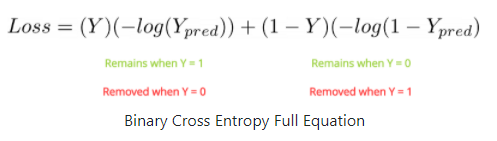

In [12]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

**Training on the data**:

 The function is called **'fit'** as we are fitting the parameters to the data.

  We specify:
- what data we are training on, which is **X_train and Y_train**
- the size of our **mini-batch**
- how long we want to train it for (**epochs**)
- what our **validation data** is so that the model will tell us how we are doing on the validation data at each point.

This function will output **a history**, which we save under the variable hist.

In [13]:
history = model.fit(X_train, Y_train,
                    epochs = 50,
                    batch_size = 32,
                    validation_data = (X_val, Y_val))

Epoch 1/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 50ms/step - accuracy: 0.5358 - loss: 0.6697 - val_accuracy: 0.6621 - val_loss: 0.6179
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7584 - loss: 0.6083 - val_accuracy: 0.8311 - val_loss: 0.5487
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7969 - loss: 0.5470 - val_accuracy: 0.8584 - val_loss: 0.4705
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8195 - loss: 0.4671 - val_accuracy: 0.8676 - val_loss: 0.4001
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8443 - loss: 0.4057 - val_accuracy: 0.8539 - val_loss: 0.3618
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8405 - loss: 0.3890 - val_accuracy: 0.8767 - val_loss: 0.3336
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8615 - loss: 0.3477 - val_accuracy: 0.8676 - val_loss: 0.3201
Epoch 8/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8617 - loss: 0.3380 - val_accuracy: 0.8813 - val_los

Evaluating our data on the test set:

In [14]:
test_loss, test_acc = model.evaluate(X_test, Y_test)
print(f"Test accuracy: {test_acc}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9123 - loss: 0.1834 
Test accuracy: 0.913241982460022


# Visualizing Loss and Accuracy

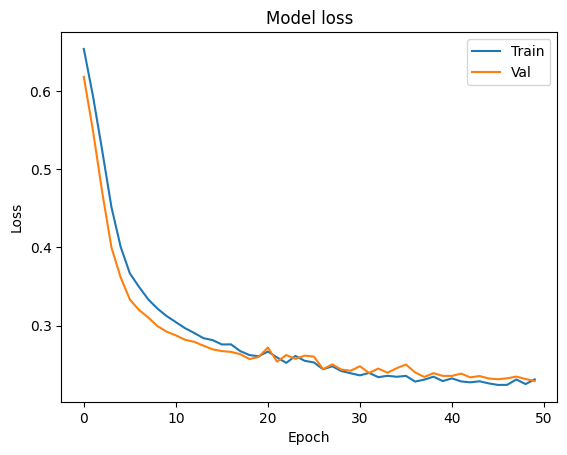

In [15]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

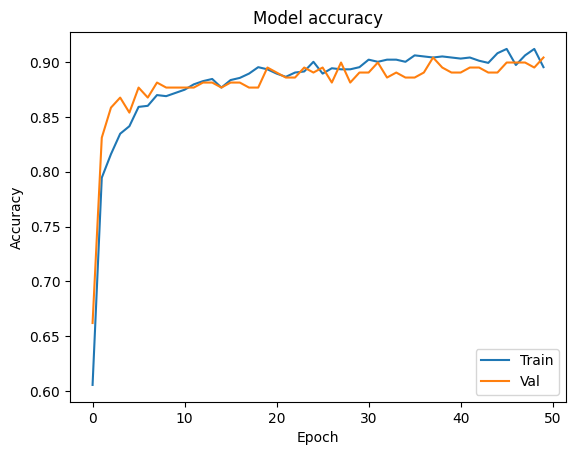

In [16]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

### TRY again with more complex Model

In [17]:
model_2 = Sequential([
    Dense(1000, activation='relu', input_shape = (10, )),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1, activation='sigmoid'),
])

model_2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

hist_2 = model_2.fit(X_train, Y_train,
          batch_size=32, epochs=50,
          validation_data=(X_val, Y_val))

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 58ms/step - accuracy: 0.6984 - loss: 0.5666 - val_accuracy: 0.8858 - val_loss: 0.3424
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8389 - loss: 0.3499 - val_accuracy: 0.8721 - val_loss: 0.3148
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8688 - loss: 0.3133 - val_accuracy: 0.8813 - val_loss: 0.2829
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8933 - loss: 0.3064 - val_accuracy: 0.8584 - val_loss: 0.3102
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8977 - loss: 0.2564 - val_accuracy: 0.8584 - val_loss: 0.3258
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8975 - loss: 0.2863 - val_accuracy: 0.8950 - val_loss: 0.2666
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9012 - loss: 0.2420 - val_accuracy: 0.8721 - val_loss: 0.2953
Epoch 8/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9081 - loss: 0.2461 - val_accuracy: 0.8676 - val_loss: 0.3012
Ep

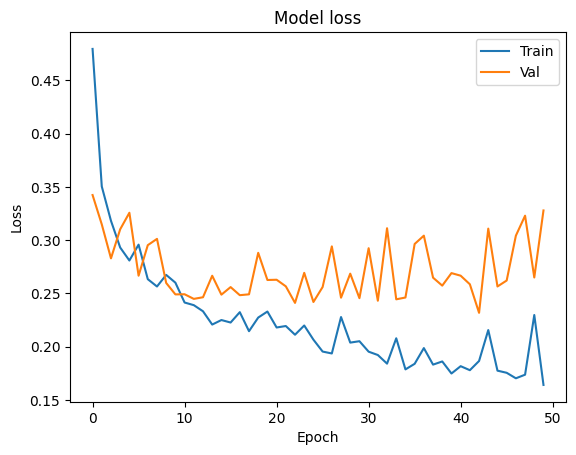

In [18]:
plt.plot(hist_2.history['loss'])
plt.plot(hist_2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

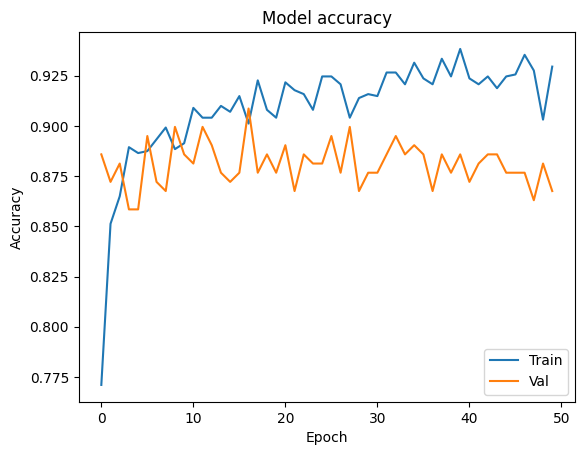

In [19]:
plt.plot(hist_2.history['accuracy'])
plt.plot(hist_2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

# **Recommendations to address this overfitting:**

**1-Early Stopping:** Implement early stopping, halting training around epoch  when validation loss is at its minimum.

**2-Regularization:** Introduce or increase regularization techniques such as L1/L2 regularization, dropout, or batch normalization.

**3-Data Augmentation:** Enhance the diversity of the training set through appropriate data augmentation techniques.

**4-Model Complexity:** Consider simplifying the model architecture if it's too complex for the dataset size.

**5-Cross-Validation:** Implement k-fold cross-validation to ensure this isn't a quirk of a particular data split.

**6-Learning Rate Schedule:** Implement a learning rate decay schedule to fine-tune the model's learning in later epochs.

To address the overfitting we see in Model 2, we'll incorporate **L2 regularization** and **dropout** in our third model here (Model 3).

In [20]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras.regularizers import l2

model_3 = Sequential([
    Dense(1000, activation='relu', kernel_regularizer=l2(0.01), input_shape = (10,)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.3),
    Dense(1, activation='sigmoid', kernel_regularizer=l2(0.01)),
])

In [21]:
model_3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

hist_3 = model_3.fit(X_train, Y_train,
          batch_size=32, epochs=50,
          validation_data=(X_val, Y_val))

Epoch 1/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 8s 129ms/step - accuracy: 0.5715 - loss: 21.1194 - val_accuracy: 0.8311 - val_loss: 3.9169
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7858 - loss: 2.5112 - val_accuracy: 0.8584 - val_loss: 0.6837
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8234 - loss: 0.6415 - val_accuracy: 0.8402 - val_loss: 0.5441
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8479 - loss: 0.5321 - val_accuracy: 0.8904 - val_loss: 0.4667
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8738 - loss: 0.4845 - val_accuracy: 0.8858 - val_loss: 0.4636
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8496 - loss: 0.5373 - val_accuracy: 0.8813 - val_loss: 0.4496
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8885 - loss: 0.4534 - val_accuracy: 0.8904 - val_loss: 0.4573
Epoch 8/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8864 - loss: 0.4690 - val_accuracy: 0.8904 - val_lo

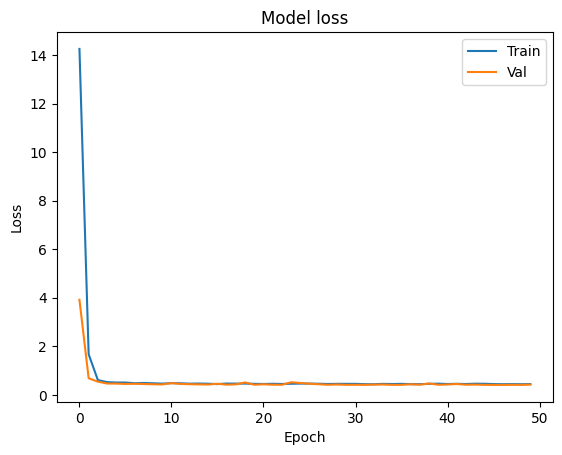

In [22]:
plt.plot(hist_3.history['loss'])
plt.plot(hist_3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

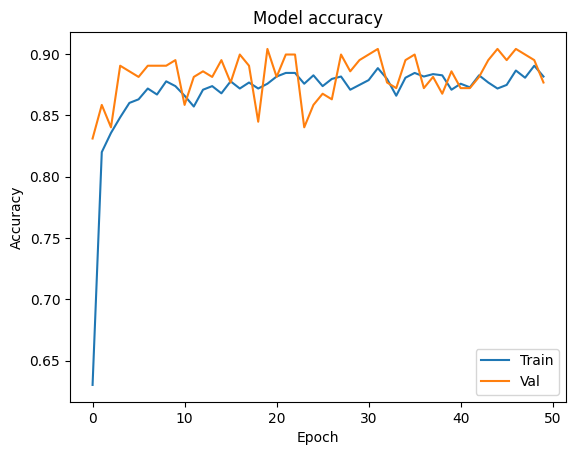

In [23]:
plt.plot(hist_3.history['accuracy'])
plt.plot(hist_3.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

As compared to Model 2, you should see that there's less overfitting!

#1.2 Fashoin MNIST

the **Fashion MNIST datase**t consists of **grayscale** images. Each image in the dataset is:

**28 x 28** pixels in size
Contains only 1 channel (grayscale), meaning the pixel values range from 0 to 255, where **0 represents black** and **255 represents white**, with shades of gray in between.

In [24]:
import keras
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [25]:
print("Train images shape:", train_images.shape)
print("Test images shape:", test_images.shape)

Train images shape: (60000, 28, 28)
Test images shape: (10000, 28, 28)


In [26]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

One-hot encode labels

In [27]:
train_labels = keras.utils.to_categorical(train_labels, num_classes=10)
train_labels

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [28]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

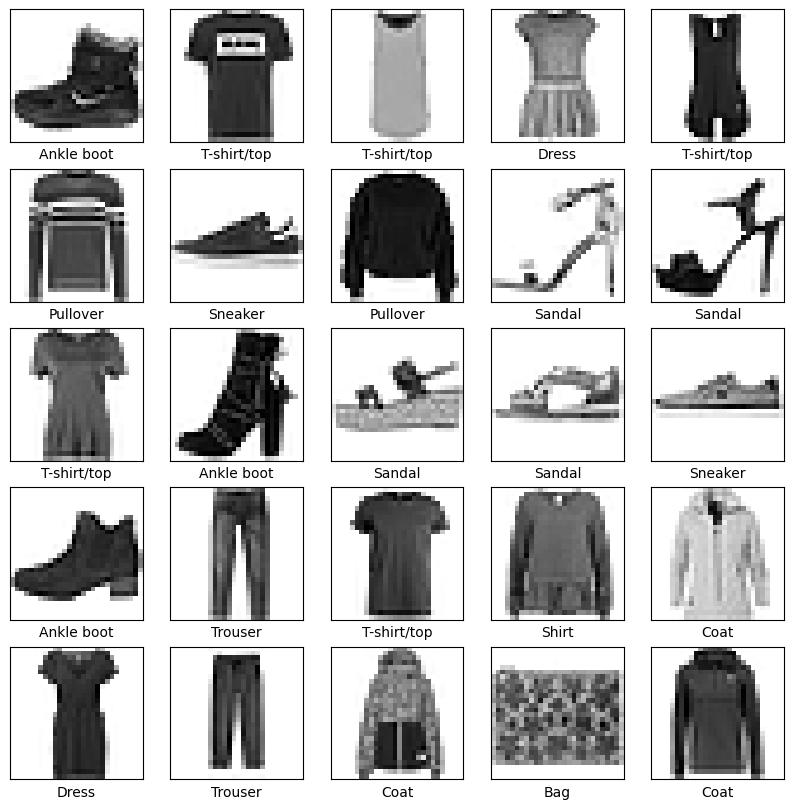

In [29]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[np.where(train_labels[i] == 1.)[0][0]])
plt.show()

In [30]:
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0, 155, 236, 207, 178, 107, 156, 161, 109,  64,  23,  77, 130,
         72,  15],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,
         69, 207, 223, 218, 216, 216, 163, 127, 121, 122, 146, 141,  88,
        172,  66],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   1,   1,   0,
        200, 232, 232, 233, 229, 223, 223, 215, 213, 164, 127, 123, 196,
        229,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        183, 225, 216, 223, 228, 235, 227, 224, 222, 224, 221, 223, 245,
        173,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        193, 228, 218, 213, 198, 180, 212, 210, 211, 213, 223, 220, 243,
        202,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   3,   0,  12,
        219, 220, 212, 218, 192, 169, 227, 208, 218, 224, 212, 226, 197,
        209,  52],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,   0,  99,
        244, 222, 220, 218, 203, 198, 221, 215, 213, 222, 220, 245, 119,
        167,  56],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   4,   0,   0,  55,
        236, 228, 230, 228, 240, 232, 213, 218, 223, 234, 217, 217, 209,
         92,   0],
       [  0,   0,   1,   4,   6,   7,   2,   0,   0,   0,   0,   0, 237,
        226, 217, 223, 222, 219, 222, 221, 216, 223, 229, 215, 218, 255,
         77,   0],
       [  0,   3,   0,   0,   0,   0,   0,   0,   0,  62, 145, 204, 228,
        207, 213, 221, 218, 208, 211, 218, 224, 223, 219, 215, 224, 244,
        159,   0],
       [  0,   0,   0,   0,  18,  44,  82, 107, 189, 228, 220, 222, 217,
        226, 200, 205, 211, 230, 224, 234, 176, 188, 250, 248, 233, 238,
        215,   0],
       [  0,  57, 187, 208, 224, 221, 224, 208, 204, 214, 208, 209, 200,
        159, 245, 193, 206, 223, 255, 255, 221, 234, 221, 211, 220, 232,
        246,   0],
       [  3, 202, 228, 224, 221, 211, 211, 214, 205, 205, 205, 220, 240,
         80, 150, 255, 229, 221, 188, 154, 191, 210, 204, 209, 222, 228,
        225,   0],
       [ 98, 233, 198, 210, 222, 229, 229, 234, 249, 220, 194, 215, 217,
        241,  65,  73, 106, 117, 168, 219, 221, 215, 217, 223, 223, 224,
        229,  29],
       [ 75, 204, 212, 204, 193, 205, 211, 225, 216, 185, 197, 206, 198,
        213, 240, 195, 227, 245, 239, 223, 218, 212, 209, 222, 220, 221,
        230,  67],
       [ 48, 203, 183, 194, 213, 197, 185, 190, 194, 192, 202, 214, 219,
        221, 220, 236, 225, 216, 199, 206, 186, 181, 177, 172, 181, 205,
        206, 115],
       [  0, 122, 219, 193, 179, 171, 183, 196, 204, 210, 213, 207, 211,
        210, 200, 196, 194, 191, 195, 191, 198, 192, 176, 156, 167, 177,
        210,  92],
       [  0,   0,  74, 189, 212, 191, 175, 172, 175, 181, 185, 188, 189,
        188, 193, 198, 204, 209, 210, 210, 211, 188, 188, 194, 192, 216,
        170,   0],
       [  2,   0,   0,   0,  66, 200, 22

In [31]:
# Normalize images to range [0,1]
train_images = train_images / 255.0
test_images = test_images / 255.0

train_images

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [32]:
# Build the model
model = Sequential([
    Flatten(input_shape=(28, 28)),  # Flatten 28x28 images into 1D
    Dense(128, activation='relu'),  # Hidden layer with 128 neurons
    Dense(10, activation='softmax') # Output layer (10 classes)
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Display model summary
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [33]:
model.fit(train_images, train_labels, epochs=50, batch_size=32, verbose=2)

Epoch 1/50
1875/1875 - 6s - 3ms/step - accuracy: 0.8260 - loss: 0.5015
Epoch 2/50
1875/1875 - 4s - 2ms/step - accuracy: 0.8631 - loss: 0.3788
Epoch 3/50
1875/1875 - 5s - 3ms/step - accuracy: 0.8771 - loss: 0.3395
Epoch 4/50
1875/1875 - 4s - 2ms/step - accuracy: 0.8848 - loss: 0.3139
Epoch 5/50
1875/1875 - 5s - 3ms/step - accuracy: 0.8915 - loss: 0.2950
Epoch 6/50
1875/1875 - 6s - 3ms/step - accuracy: 0.8958 - loss: 0.2823
Epoch 7/50
1875/1875 - 4s - 2ms/step - accuracy: 0.8999 - loss: 0.2708
Epoch 8/50
1875/1875 - 5s - 3ms/step - accuracy: 0.9039 - loss: 0.2583
Epoch 9/50
1875/1875 - 5s - 3ms/step - accuracy: 0.9074 - loss: 0.2482
Epoch 10/50
1875/1875 - 4s - 2ms/step - accuracy: 0.9086 - loss: 0.2430
Epoch 11/50
1875/1875 - 4s - 2ms/step - accuracy: 0.9136 - loss: 0.2326
Epoch 12/50
1875/1875 - 4s - 2ms/step - accuracy: 0.9164 - loss: 0.2243
Epoch 13/50
1875/1875 - 5s - 3ms/step - accuracy: 0.9165 - loss: 0.2207
Epoch 14/50
1875/1875 - 4s - 2ms/step - accuracy: 0.9208 - loss: 0.2132
E

In [34]:
# One-hot encode labels
test_labels = keras.utils.to_categorical(test_labels, num_classes=10)

test_labels

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [35]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 1s - 4ms/step - accuracy: 0.8846 - loss: 0.4953

Test accuracy: 0.8845999836921692


It turns out that the accuracy on the test dataset is a little less than the accuracy on the training dataset. This gap between training accuracy and test accuracy represents overfitting. Overfitting happens when a machine learning model performs worse on new, previously unseen inputs than it does on the training data. An overfitted model "memorizes" the noise and details in the training dataset to a point where it negatively impacts the performance of the model on the new data.

### Add Dropout - Appropriate Learning rate
![download (4)](https://s3-ap-south-1.amazonaws.com/av-blog-media/wp-content/uploads/2018/04/1IrdJ5PghD9YoOyVAQ73MJw.gif)


In [36]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, Dropout
from keras.optimizers import Adam
from keras.utils import to_categorical
import matplotlib.pyplot as plt

# Load dataset
from keras.datasets import fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Normalize images
train_images, test_images = train_images / 255.0, test_images / 255.0

# One-hot encode labels
train_labels = to_categorical(train_labels, num_classes=10)
test_labels = to_categorical(test_labels, num_classes=10)

# Define model with Dropout
model2 = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dropout(0.3),  # Dropout to prevent overfitting
    Dense(64, activation='relu'),
    Dropout(0.3),  # Another Dropout layer
    Dense(10, activation='softmax')  # Output layer
])

optimizer = Adam(learning_rate=0.001)

model2.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model and store history
history = model2.fit(train_images, train_labels, epochs=50, validation_data=(test_images, test_labels), batch_size=32)

Epoch 1/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.7002 - loss: 0.8470 - val_accuracy: 0.8439 - val_loss: 0.4418
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8272 - loss: 0.4780 - val_accuracy: 0.8457 - val_loss: 0.4158
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8431 - loss: 0.4313 - val_accuracy: 0.8604 - val_loss: 0.3873
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8567 - loss: 0.3981 - val_accuracy: 0.8608 - val_loss: 0.3846
Epoch 5/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8606 - loss: 0.3902 - val_accuracy: 0.8633 - val_loss: 0.3826
Epoch 6/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8641 - loss: 0.3748 - val_accuracy: 0.8632 - val_loss: 0.3767
Epoch 7/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8653 - loss: 0.3639 - val_accuracy: 0.8681 - val_loss: 0.3681
Epoch 8/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8675 - loss: 0.3605 -

In [37]:
# Evaluate model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 1s - 2ms/step - accuracy: 0.8846 - loss: 0.4953

Test accuracy: 0.8845999836921692


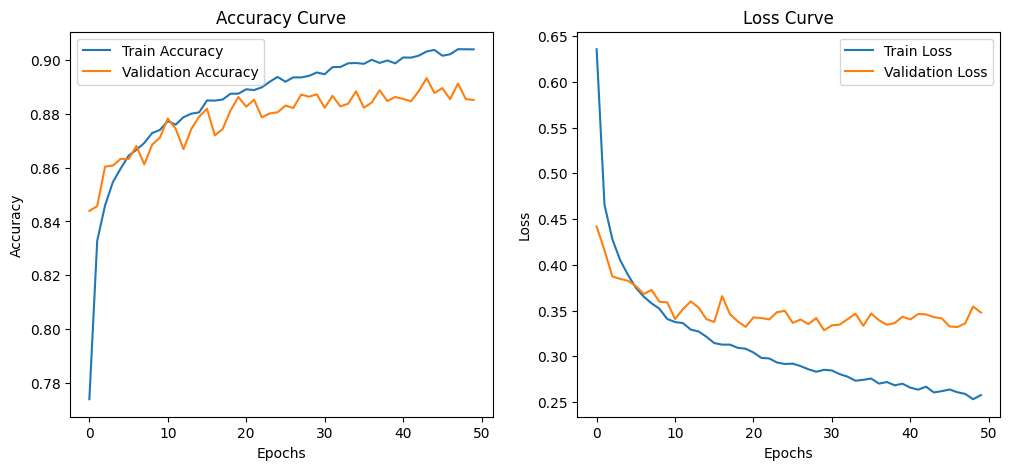

In [38]:
# Plot accuracy & loss curves
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy Curve')

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Curve')

plt.show()

# **Cifar Dataset**

![download (4)](https://www.kdnuggets.com/wp-content/uploads/garg_building_training_first_neural_network_tensorflow_keras_7.png)


In [39]:
import keras
from keras.datasets import cifar10

# load the pre-shuffled train and test data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 8s 0us/step


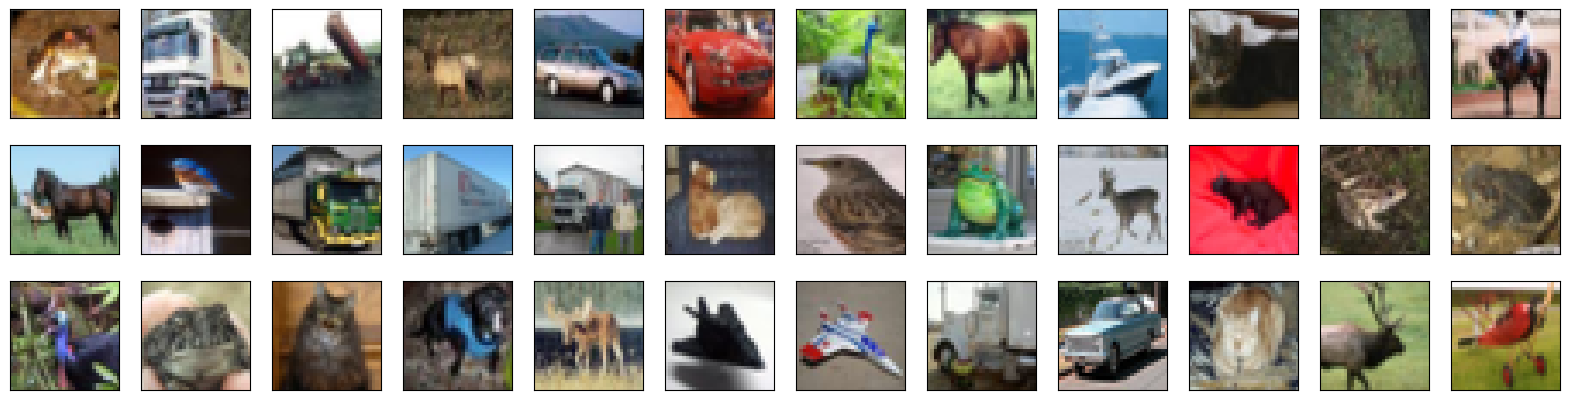

In [40]:
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(20,5))
for i in range(36):
    ax = fig.add_subplot(3, 12, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_train[i]))

Rescale/Normalize the Images by Dividing Every Pixel in Every Image by 255

In [41]:
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

In [42]:
# one-hot encode the labels
num_classes = len(np.unique(y_train))
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# break training set into training and validation sets
(x_train, x_valid) = x_train[5000:], x_train[:5000]
(y_train, y_valid) = y_train[5000:], y_train[:5000]

# print shape of training set
print('x_train shape:', x_train.shape)

# print number of training, validation, and test images
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print(x_valid.shape[0], 'validation samples')

x_train shape: (45000, 32, 32, 3)
45000 train samples
10000 test samples
5000 validation samples


Model Arch

In [43]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten

# define the model
model = Sequential()
model.add(Flatten(input_shape = x_train.shape[1:])) #input_shape = (32, 32, 3)
model.add(Dense(1000, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 1000)           │     3,073,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 1000)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 512)            │       512,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,590,642 (13.70 MB)

 Trainable params: 3,590,642 (13.70 MB)

 Non-trainable params: 0 (0.00 B)

In [44]:
# compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam',
                  metrics=['accuracy'])

hist = model.fit(x_train, y_train, batch_size=32, epochs=50,
          validation_data=(x_valid, y_valid),
          verbose=2, shuffle=True)

Epoch 1/50
1407/1407 - 10s - 7ms/step - accuracy: 0.2730 - loss: 1.9841 - val_accuracy: 0.3474 - val_loss: 1.8230
Epoch 2/50
1407/1407 - 6s - 4ms/step - accuracy: 0.3231 - loss: 1.8499 - val_accuracy: 0.3652 - val_loss: 1.7851
Epoch 3/50
1407/1407 - 4s - 3ms/step - accuracy: 0.3458 - loss: 1.8033 - val_accuracy: 0.3800 - val_loss: 1.7191
Epoch 4/50
1407/1407 - 4s - 3ms/step - accuracy: 0.3527 - loss: 1.7779 - val_accuracy: 0.3994 - val_loss: 1.6889
Epoch 5/50
1407/1407 - 5s - 4ms/step - accuracy: 0.3598 - loss: 1.7613 - val_accuracy: 0.3954 - val_loss: 1.6812
Epoch 6/50
1407/1407 - 5s - 3ms/step - accuracy: 0.3680 - loss: 1.7415 - val_accuracy: 0.3846 - val_loss: 1.6951
Epoch 7/50
1407/1407 - 4s - 3ms/step - accuracy: 0.3738 - loss: 1.7280 - val_accuracy: 0.4004 - val_loss: 1.6910
Epoch 8/50
1407/1407 - 5s - 3ms/step - accuracy: 0.3798 - loss: 1.7149 - val_accuracy: 0.3988 - val_loss: 1.6924
Epoch 9/50
1407/1407 - 4s - 3ms/step - accuracy: 0.3794 - loss: 1.7209 - val_accuracy: 0.4154 -

In [45]:
# evaluate and print test accuracy
score = model.evaluate(x_test, y_test, verbose=0)
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.44909998774528503


# **Lab Practice**

# **2-MLP for Regression tasks**
- When the target (**y**) is continuous (real)
- For loss function and evaluation metric, mean squared error (MSE) is commonly used

1. Use **Boston housing dataset** which has total 506 data instances (404 training & 102 test),  13 attributes (features) to predict "the median values of the houses at a location"

 https://keras.io/datasets/


```
from tensorflow.keras.datasets import boston_housing
(X_train, y_train), (X_test, y_test) = boston_housing.load_data()
```

2. Build & train a neural network, try to improve it by applying the tips above



# Okay, Let's get our hands dirty with the lab practice

**Load the Dataset**

In [46]:
from tensorflow.keras.datasets import boston_housing
import pandas as pd

(X_train, y_train), (X_test, y_test) = boston_housing.load_data()

57026/57026 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step


In [47]:
X_train

array([[1.23247e+00, 0.00000e+00, 8.14000e+00, ..., 2.10000e+01,
        3.96900e+02, 1.87200e+01],
       [2.17700e-02, 8.25000e+01, 2.03000e+00, ..., 1.47000e+01,
        3.95380e+02, 3.11000e+00],
       [4.89822e+00, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
        3.75520e+02, 3.26000e+00],
       ...,
       [3.46600e-02, 3.50000e+01, 6.06000e+00, ..., 1.69000e+01,
        3.62250e+02, 7.83000e+00],
       [2.14918e+00, 0.00000e+00, 1.95800e+01, ..., 1.47000e+01,
        2.61950e+02, 1.57900e+01],
       [1.43900e-02, 6.00000e+01, 2.93000e+00, ..., 1.56000e+01,
        3.76700e+02, 4.38000e+00]])

In [48]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Fit the scaler on X and transform X to the scaled version
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

In [49]:
X_train

array([[-0.27224633, -0.48361547, -0.43576161, ...,  1.14850044,
         0.44807713,  0.8252202 ],
       [-0.40342651,  2.99178419, -1.33391162, ..., -1.71818909,
         0.43190599, -1.32920239],
       [ 0.1249402 , -0.48361547,  1.0283258 , ...,  0.78447637,
         0.22061726, -1.30850006],
       ...,
       [-0.40202987,  0.99079651, -0.7415148 , ..., -0.71712291,
         0.07943894, -0.67776904],
       [-0.17292018, -0.48361547,  1.24588095, ..., -1.71818909,
        -0.98764362,  0.42083466],
       [-0.40422614,  2.04394792, -1.20161456, ..., -1.30866202,
         0.23317118, -1.15392266]])

In [50]:
#Build model

model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1)
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [51]:
from tensorflow.keras.optimizers import Adam

model.compile(
    optimizer=Adam(learning_rate=1e-3),
    loss='mse',
    metrics=['mse']
)
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_21 (Dense)                │ (None, 64)             │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,121 (20.00 KB)

 Trainable params: 5,121 (20.00 KB)

 Non-trainable params: 0 (0.00 B)

In [52]:
# 4. Train with validation split
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    verbose=2
)

Epoch 1/50
11/11 - 2s - 223ms/step - loss: 536.8225 - mse: 536.8225 - val_loss: 577.7253 - val_mse: 577.7253
Epoch 2/50
11/11 - 1s - 93ms/step - loss: 486.4921 - mse: 486.4921 - val_loss: 520.7642 - val_mse: 520.7642
Epoch 3/50
11/11 - 0s - 8ms/step - loss: 424.5861 - mse: 424.5861 - val_loss: 445.9785 - val_mse: 445.9785
Epoch 4/50
11/11 - 0s - 12ms/step - loss: 347.2101 - mse: 347.2101 - val_loss: 352.5066 - val_mse: 352.5066
Epoch 5/50
11/11 - 0s - 17ms/step - loss: 257.3576 - mse: 257.3576 - val_loss: 248.4065 - val_mse: 248.4065
Epoch 6/50
11/11 - 0s - 14ms/step - loss: 168.0072 - mse: 168.0072 - val_loss: 158.5610 - val_mse: 158.5610
Epoch 7/50
11/11 - 0s - 27ms/step - loss: 104.5016 - mse: 104.5016 - val_loss: 105.1263 - val_mse: 105.1263
Epoch 8/50
11/11 - 0s - 24ms/step - loss: 74.9345 - mse: 74.9345 - val_loss: 79.8810 - val_mse: 79.8810
Epoch 9/50
11/11 - 0s - 29ms/step - loss: 58.7038 - mse: 58.7038 - val_loss: 64.2329 - val_mse: 64.2329
Epoch 10/50
11/11 - 0s - 28ms/step -

In [53]:
# 5. Evaluate on test set
test_mse = model.evaluate(X_test, y_test, verbose=0)[0]
print(f"\nTest MSE: {test_mse:.3f}")


Test MSE: 23.585


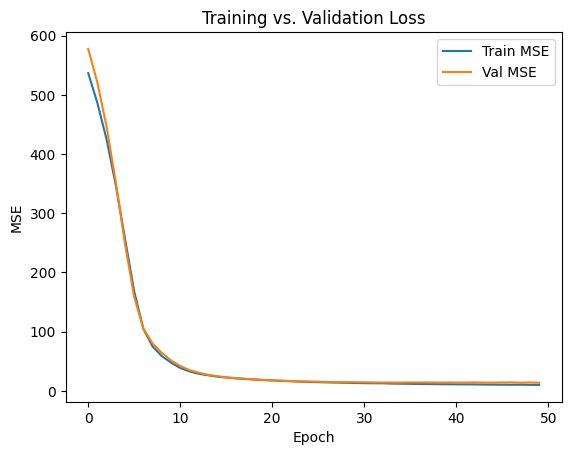

In [54]:
# 6. Plot training & validation loss
plt.figure()
plt.plot(history.history['loss'], label='Train MSE')
plt.plot(history.history['val_loss'], label='Val MSE')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()
plt.title('Training vs. Validation Loss')
plt.show()